In [178]:
import pandas as pd, matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob as tb
import sqlite3
#import statsmodels.api as sm
import json
import matplotlib.dates as mdates
import datetime as dt

In [324]:
# create datetime for the date
# parameter: file

def csv(file):
    df = pd.read_csv(file, sep = ",", skiprows = 2)
    df2 = pd.read_csv("data_table_for_daily_death_trends__arizona.csv", sep = "," , skiprows = 2)
    df["New Deaths"] = df2["New Deaths"]
    df["Doses Per Day"] = 0
    df["Dates"] = df["Date"].replace({"Jan":"01", "Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}, regex = True)
    df["Total Doses Administered"] = df["Total Doses Administered"].fillna(0)
    for i in range(1, len(df["Total Doses Administered"])-1):
        a = pd.to_numeric(df["Total Doses Administered"])
        df.loc[i-1,"Doses Per Day"] = abs((int(a.iloc[i-1]) - int(a.iloc[i])))
        a.append(df["Doses Per Day"])
    for j in 
    df.drop(labels = [0], axis = 0)
    df.drop([0, 1, 2], axis = 0,inplace = True)
    for j in range
    df.drop(df.iloc[634], axis = 0,inplace = True)
    del df["7-Day Moving Avg"]
    del df["State"]
    return df


In [325]:
csv("data_table_for_daily_case_trends__arizona.csv")

KeyError: "['State' 'Date' 'New Cases' '7-Day Moving Avg' 'Total Doses Administered'\n 'New Deaths' 'Doses Per Day' 'Dates'] not found in axis"

In [303]:
def figure1():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df["Dates"]]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.plot(x,df['New Cases'])
    plt.gcf().autofmt_xdate()
    plt.xlabel("Dates")
    plt.ylabel("New Cases")

In [304]:
def figure2():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    plt.figure(figsize=(10,10))
    plt.style.use('ggplot')
    lst_dates = []
    for i in df['Dates']:
        lst_dates.append(i)
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df["Dates"]]
    lst = []
    for i in df['New Deaths']:
        lst.append(i)
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x,lst,width=0.8, color='red')
    plt.xlabel("Dates")
    plt.ylabel("New Deaths")

In [321]:
def figure3():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    plt.figure(figsize=(16,10), dpi= 80)
    lst = []
    df_1 = df.iloc[3:634,:]
    for i in df_1["Doses Per Day"]:
        lst.append(i)
    x = np.array(df_1["Dates"])
    y = np.array(lst)
    plt.scatter(x, y)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.xlabel("Dates")
    plt.ylabel("Doses Per Day")

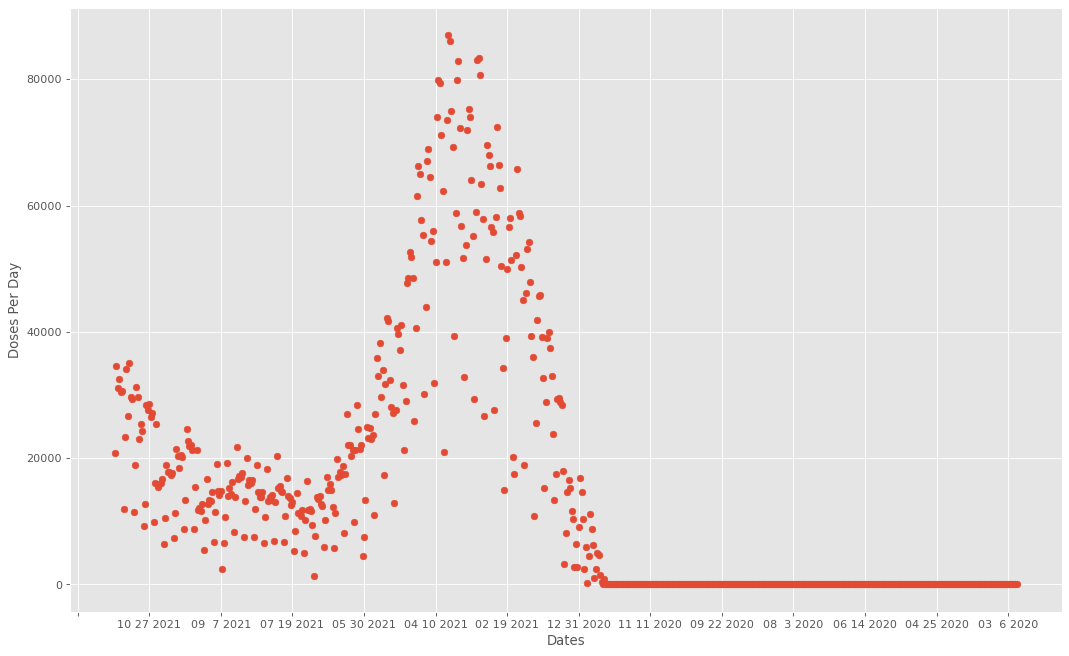

In [322]:
#figure1()
#figure2()
figure3()
plt.show()